In [52]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [53]:
# Physical constants
mu = 700.0e-4
Rs = 800.0
Ec = 4.5e5
beta = 1.4
q = 1.60217646e-19  # electron charge mu=700.0e-19
Kb = 1.3806503e-23  # Boltzmann’s constant
vf = 1e6  # Characteristic electron velocity
epsr = 8.85418782e-12  # Permittivity of vacuum
h = 6.62668e-34  # Planck’s constant
Hsub = 285e-9  # Substrate thickness
tox = 15e-9  # Top gate dielectric thickness
L = 1e-6  # Gate length
W = 1.1e-6  # Channel Width
Cgio = 0.8072  # Top-gate capacitance factor
ntop = 0.5e16  # Charge density
k_sub = 3.9  # Back-gate dielectric constant
k = 3.9  # Top-gate dielectric constant
h_ba = h / (2 * np.pi)  # Reduced Planck’s constant

In [54]:
# A fuction that creates the curves, and plots them
def curves(Vgs0, Vbs0, Vbs, Vds, Vgslow, Vgshigh,label,color):

    Vgs = np.arange(Vgslow, Vgshigh + 0.1, 0.1)
    tam = Vgs.shape[0]

    # Model Equations
    Cq = np.sqrt(ntop / np.pi) * (q**2 / (vf * h_ba))  # Quantum capacitance
    Ce = Cgio * epsr * k / tox  # Capacitance between gate and channel
    Ctop = Cq * Ce / (Cq + Ce)  # Effective Gate Capacitance
    Cback = epsr * k_sub / Hsub  # Capacitance between back-gate and channel
    Vo = Vgs0 + (Cback / Ctop) * (Vbs0 - Vbs)  # Vo threshold voltage
    Vc = Ec * L  # Vc surface potential of the channel

    Ids = np.zeros(tam)

    Y = beta * W * mu * Ec * Ctop * Rs

    for i in range(tam):
        Vg0 = Vgs[i] - Vo
        if Vg0 <= 0:  # HOLE CONDUCTION
            Vdsat1h = (1 / (Y + 1)**2) * (2 * Vg0 * Y * (1 + Y) + (1 - Y) * (Vc - np.sqrt((Vc**2) - 2 * Vc * Vg0 * (Y + 1))))
            Vdsat2h = Vdsat1h - 0.5 * (abs(Vg0 - Vdsat1h))
            if Vds > Vdsat1h:  # Triode region && Vds > Vdsat2h
                Ids[i] = -(1.0 / (4.0 * Rs)) * (Vc - Vds + 2.0 * Y * (Vds / 2.0 - Vg0) - np.sqrt((Vc + Vds + 2.0 * Y * (Vds / 2.0 - Vg0))**2 - 4.0 * Vc * Vds))
            elif Vds >= Vdsat1h and Vds <= Vdsat2h:  # Unipolar Saturation Region
                Ids[i] = (Y / (Rs * (1 + Y)**2)) * (-Vc + (1 + Y) * Vg0 + np.sqrt(Vc**2 - 2 * (1 + Y) * Vc * Vg0))
            elif Vds < Vdsat2h:  # Ambipolar Saturation Region
                Ids[i] = -(W / (2.0 * L)) * mu * Ctop * Vdsat2h**2 * ((Vds / Vdsat2h - 1)**2) + (Y / (Rs * (1 + Y)**2)) * (
                        -Vc + (1 + Y) * Vg0 + np.sqrt(Vc**2 - 2 * (1 + Y) * Vc * Vg0))
        else:  # ELECTRON CONDUCTION if (Vgs(i)-Vo)>=0
            Vdsat1e = 1.0 / (Y + 1)**2 * (2.0 * Vg0 * Y * (1 + Y) + (Y - 1) * (Vc - np.sqrt(Vc**2 + 2.0 * Vc * Vg0 * (Y + 1))))
            Vdsat2e = Vdsat1e + 0.5 * (abs(Vg0 - Vdsat1e))
            if Vds < Vdsat1e:  # Triode region
                Ids[i] = (1.0 / (4.0 * Rs)) * (Vc + Vds - 2.0 * Y * (Vds / 2.0 - Vg0) - np.sqrt((-Vc + Vds + 2.0 * Y * (Vds / 2.0 - Vg0))**2 + 4.0 * Vc * Vds))
            elif Vds >= Vdsat1e and Vds <= Vdsat2e:  # Unipolar Saturation Region
                Ids[i] = (Y / (Rs * (1 + Y)**2)) * (Vc + (1 + Y) * Vg0 - np.sqrt(Vc**2 + 2 * (1 + Y) * Vc * Vg0))
            elif Vds >= Vdsat2e:  # Ambipolar Saturation Region
                Ids[i] = (W / (2.0 * L)) * mu * Ctop * Vdsat2e**2 * (((Vds / Vdsat2e) - 1)**2) + (Y / (Rs * (1 + Y)**2)) * (
                        Vc + (1 + Y) * Vg0 - np.sqrt(Vc**2 + 2 * (1 + Y) * Vc * Vg0))

    # Plot the results
    plt.plot(Vgs, Ids, color)
    plt.xlabel(r'$V_{GS}$ (V)')
    plt.ylabel(r'$I_{DS}$ (A)')
    #plt.title('Ids=f(Vgs)')
    plt.grid(True)
    # Save the plot before clearing or showing
    #plt.tight_layout()  # Optional: avoid label cut-off
    #plt.savefig(r"C:\Users\diogo\Desktop\new_tese_after_git\Apoio à escrita\documento_tese\images\chap6\data\1st_gfet_data.png", dpi=300)

    
    Ids = Ids.tolist()
    Ids.append(label)
    

    return Ids


[5.294401568055676e-05,
 5.2904339060334124e-05,
 5.286432983352435e-05,
 5.2823983777821324e-05,
 5.2783296598765546e-05,
 5.274226392818965e-05,
 5.270088132262055e-05,
 5.265914426164184e-05,
 5.2617048146211405e-05,
 5.257458829693487e-05,
 5.253175995229481e-05,
 5.2488558266829415e-05,
 5.244497830926495e-05,
 5.240101506059664e-05,
 5.2356663412118505e-05,
 5.231191816339742e-05,
 5.226677402019459e-05,
 5.2221225592327534e-05,
 5.217526739147424e-05,
 5.2128893828916474e-05,
 5.208209921321885e-05,
 5.203487774784465e-05,
 5.1987223528702914e-05,
 5.1939130541627663e-05,
 5.1890592659783465e-05,
 5.184160364099896e-05,
 5.1792157125022386e-05,
 5.1742246630698266e-05,
 5.1691865553062516e-05,
 5.164100716035222e-05,
 5.158966459092848e-05,
 5.153783085010813e-05,
 5.148549880690176e-05,
 5.1432661190654594e-05,
 5.137931058758719e-05,
 5.132543943723214e-05,
 5.1271040028762203e-05,
 5.1216104497207734e-05,
 5.116062481955827e-05,
 5.110459281074495e-05,
 5.104800011949698e-05,

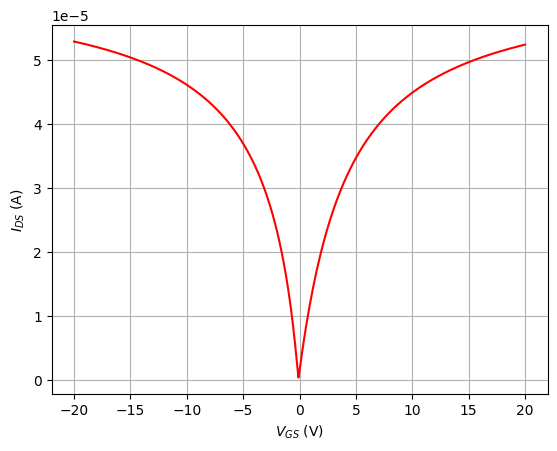

In [55]:
vgs0min = -0
vgs0max = -2

vbs0min = 0
vbs0max = 2

vbsmin = 2
vbsmax = 5

vdsmin = 0.1
vdsmax = 0.15

vgslow=-20 
vgshigh = 20

label = "A"
color = "r"
curves(vgs0min, vbs0min, vbsmin, vdsmin, vgslow, vgshigh,label,color)





In [56]:
# A funtion to set the curve's parameters, in acordance to the gas
def parameter_selector(gas):

    if gas=="H":
        vgs0min = -1
        vgs0max = 1

        vbs0min = 0 + random.uniform(-0.01,0.01)
        vbs0max = 2+ random.uniform(-0.01,0.01)

        vbsmin = 2+ random.uniform(-0.01,0.01)
        vbsmax = 5+ random.uniform(-0.01,0.01)

        vdsmin = 0.1+ random.uniform(-0.01,0.01)
        vdsmax = 0.15+ random.uniform(-0.01,0.01)
    
    elif gas=="N":

        vgs0min = 0
        vgs0max = 2

        vbs0min = 0 + random.uniform(-0.01,0.01)
        vbs0max = 2+ random.uniform(-0.01,0.01)

        vbsmin = 2+ random.uniform(-0.01,0.01)
        vbsmax = 5+ random.uniform(-0.01,0.01)

        vdsmin = 0.1+ random.uniform(-0.01,0.01)
        vdsmax = 0.15+ random.uniform(-0.01,0.01)

    elif gas=="Ar":

        vgs0min = 1
        vgs0max = 3

        vbs0min = 0 + random.uniform(-0.01,0.01)
        vbs0max = 2+ random.uniform(-0.01,0.01)

        vbsmin = 2+ random.uniform(-0.01,0.01)
        vbsmax = 5+ random.uniform(-0.01,0.01)

        vdsmin = 0.1+ random.uniform(-0.01,0.01)
        vdsmax = 0.15+ random.uniform(-0.01,0.01)
    elif gas=="CO2":

        vgs0min = 2
        vgs0max = 4

        vbs0min = 0 + random.uniform(-0.01,0.01)
        vbs0max = 2+ random.uniform(-0.01,0.01)

        vbsmin = 2+ random.uniform(-0.01,0.01)
        vbsmax = 5+ random.uniform(-0.01,0.01)

        vdsmin = 0.1+ random.uniform(-0.01,0.01)
        vdsmax = 0.15+ random.uniform(-0.01,0.01)
    return vgs0min,vgs0max, vbs0min,vbs0max,vbsmin,vbsmax,vdsmin,vdsmax

In [57]:
random.uniform(-0.1,0.1)

-0.08548226052788982

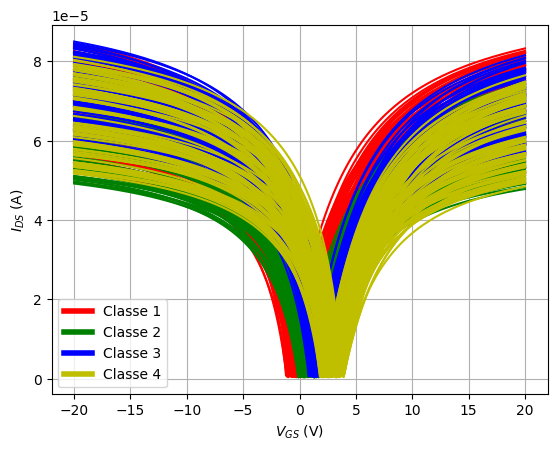

In [58]:
vgslow=-20 
vgshigh = 20
n_curves = 100

data = []
label = []
gas="H"
params = parameter_selector(gas)

for i in range(n_curves):
    label.append(gas)
    data.append( curves(random.uniform(params[0],params[1]), random.uniform(params[2],params[3]),
    random.uniform(params[4],params[5]), random.uniform(params[6],params[7]), vgslow,vgshigh,gas,'r'))


gas="N"
params = parameter_selector(gas)

for i in range(n_curves):
    label.append(gas)
    data.append( curves(random.uniform(params[0],params[1]), random.uniform(params[2],params[3]),
    random.uniform(params[4],params[5]), random.uniform(params[6],params[7]), vgslow,vgshigh,gas,'g'))



gas="Ar"
params = parameter_selector(gas)

for i in range(n_curves):
    label.append(gas)
    data.append( curves(random.uniform(params[0],params[1]), random.uniform(params[2],params[3]),
    random.uniform(params[4],params[5]), random.uniform(params[6],params[7]),vgslow,vgshigh,gas,'b'))



gas="CO2"
params = parameter_selector(gas)

for i in range(n_curves):
    label.append(gas) 
    data.append( curves(random.uniform(params[0],params[1]), random.uniform(params[2],params[3]),
    random.uniform(params[4],params[5]), random.uniform(params[6],params[7]), vgslow,vgshigh,gas,'y'))

from matplotlib.lines import Line2D


# Define custom lines with labels
custom_lines = [
    Line2D([0], [0], color='r', lw=4, label='Classe 1'),
    Line2D([0], [0], color='g', lw=4, label='Classe 2'),
    Line2D([0], [0], color='b', lw=4, label='Classe 3'),
    Line2D([0], [0], color='y', lw=4, label='Classe 4')
]

# Now you have custom lines with labels that can be used in the legend
plt.legend(handles=custom_lines)




In [59]:
data_df = pd.DataFrame(data)

In [61]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,H
1,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,...,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,H
2,0.000064,0.000064,0.000064,0.000064,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,...,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,H
3,0.000073,0.000073,0.000073,0.000073,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,...,0.000070,0.000070,0.000070,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,H
4,0.000076,0.000076,0.000076,0.000076,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000071,0.000070,...,0.000067,0.000067,0.000067,0.000067,0.000067,0.000068,0.000068,0.000068,0.000068,CO2
396,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,...,0.000066,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,CO2
397,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,...,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,CO2
398,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000053,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,CO2


In [62]:
for idx, row in data_df.iterrows():
    ids = row[0:400]
    label = row[401]

In [92]:
plot_df = data_df.melt(id_vars=401, var_name='point', value_name='value')

In [93]:
mapping = {"Ar": "Amostra 1", "CO2": "Amostra 2", "H": "Amostra 3","N":"Amostra 4"}
plot_df[401] = plot_df[401].map(mapping)


In [94]:
plot_df

,401,point,value
0,Amostra 3,0,0.000057
1,Amostra 3,0,0.000071
2,Amostra 3,0,0.000064
3,Amostra 3,0,0.000073
4,Amostra 3,0,0.000076
...,...,...,...
160395,Amostra 2,400,0.000068
160396,Amostra 2,400,0.000067
160397,Amostra 2,400,0.000067
160398,Amostra 2,400,0.000054


C:\Users\diogo\AppData\Local\Temp\ipykernel_35780\3048328892.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


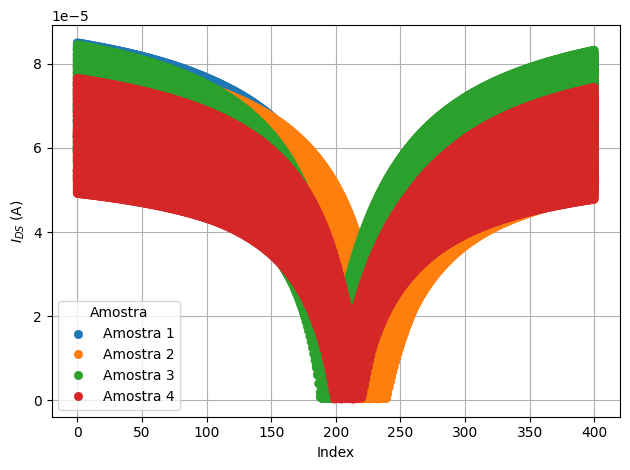

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get Matplotlib's default color cycle as a list
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Sort the DataFrame
plot_df = plot_df.sort_values(by=401)

# Plot using Seaborn with Matplotlib's default colors
sns.scatterplot(
    data=plot_df,
    x="point",
    y="value",
    hue=401,
    edgecolor=None,
    zorder=3,
    palette=default_colors
)

# Grid and labels
plt.grid(True)
plt.xlabel("Index")
plt.ylabel(r'$I_{DS}$ (A)')
plt.legend(title="Amostra")
plt.tight_layout()


plt.savefig(r"C:\Users\diogo\Desktop\new_tese_after_git\Apoio à escrita\documento_tese\images\chap6\data\1st_gfet_data.png", dpi=300)

plt.show()


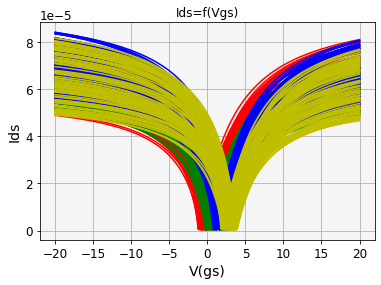

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.lines import Line2D

# Define voltage range
vgslow = -20 
vgshigh = 20
n_curves = 100

data = []
label = []
gas_list = ["H", "N", "Ar", "CO2"]
colors = ['r', 'g', 'b', 'y']

# Assuming parameter_selector() and curves() are defined elsewhere
for gas, color in zip(gas_list, colors):
    params = parameter_selector(gas)
    for _ in range(n_curves):
        label.append(gas)
        data.append(curves(
            random.uniform(params[0], params[1]),
            random.uniform(params[2], params[3]),
            random.uniform(params[4], params[5]),
            random.uniform(params[6], params[7]),
            vgslow, vgshigh, gas, color
        ))


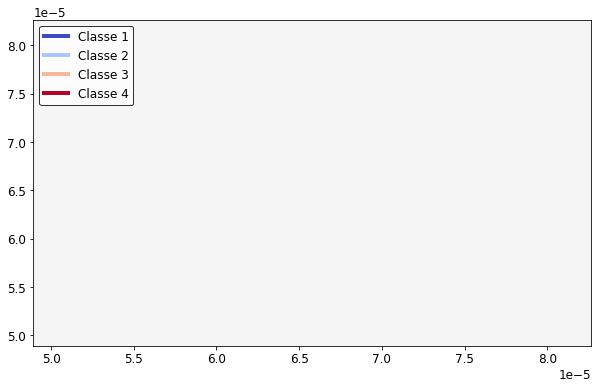

In [11]:

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size

# Assuming data contains curves to plot
for curve, gas in zip(data, label):
    color = plt.get_cmap("coolwarm")((gas_list.index(gas) / (len(gas_list) - 1)))
    ax.plot(curve[0], curve[1], color=color, alpha=0.6)  # Adjust alpha for visibility

# Custom legend
custom_lines = [
    Line2D([0], [0], color=plt.get_cmap("coolwarm")(i / (len(gas_list) - 1)), lw=4, label=f'Classe {i+1}')
    for i in range(len(gas_list))
]
ax.legend(handles=custom_lines)

plt.show()

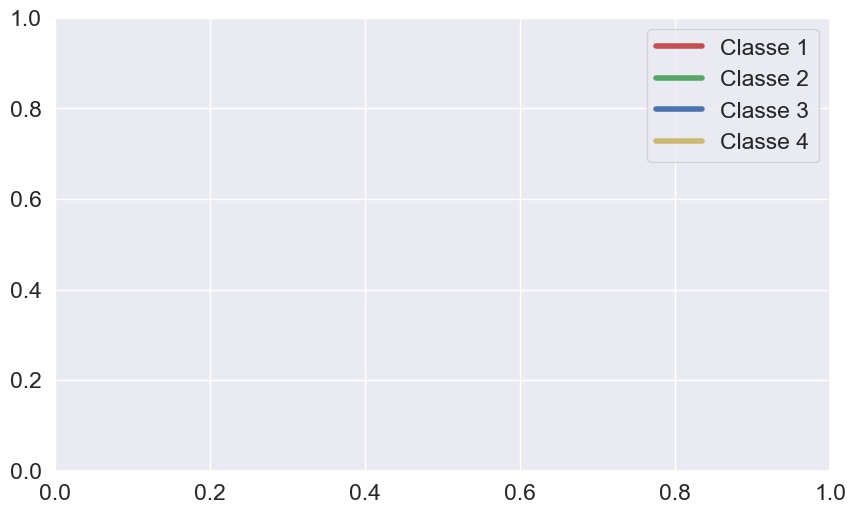

In [11]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(rc={"figure.dpi":100, 'savefig.dpi':1000}) 
sns.set(font_scale=1.5)

# Define custom lines with labels
custom_lines = [
    Line2D([0], [0], color='r', lw=4, label='Classe 1'),
    Line2D([0], [0], color='g', lw=4, label='Classe 2'),
    Line2D([0], [0], color='b', lw=4, label='Classe 3'),
    Line2D([0], [0], color='y', lw=4, label='Classe 4')
]

# Now you have custom lines with labels that can be used in the legend
plt.legend(handles=custom_lines)




In [10]:
data_df = pd.DataFrame(data)

In [140]:
data_df.rename(columns={40002: "label"}, inplace=True)
data_df

,0,1,2,3,4,5,6,7,8,9,...,39993,39994,39995,39996,39997,39998,39999,40000,40001,label
0,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,H
1,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,H
2,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,H
3,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,H
4,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,...,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,0.000072,...,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,CO2
396,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,...,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,CO2
397,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,0.000055,CO2
398,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,CO2


# Machine learning

In [141]:
# basic imports
import sklearn
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})
sns.set(rc={"figure.dpi":100, 'savefig.dpi':1000}) 
sns.set(font_scale=1.5)

In [142]:
# Map label to int
mapping = {'H': 0, 'N': 1, 'Ar': 2, "CO2":3}
data_df["label"] = data_df["label"].map(mapping)

In [143]:
# split into data and label
x = data_df.drop("label",axis=1)
y = data_df.label

(-23.70925588607788,
 20.73118848800659,
 -19.569486904144288,
 18.555549907684327)

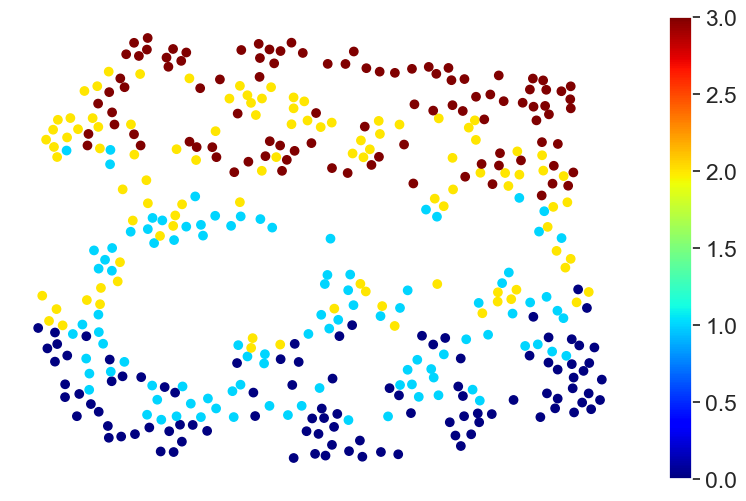

In [144]:
# Apply TSNE -> É só por uma questão de visualização. Isto é tipo PCA, mas maximiza a separação das variáveis
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(x)

plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c =y, cmap='jet')
plt.colorbar()
plt.axis('off')

In [145]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [146]:
# Aplly PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pc_train = pca.fit_transform(X_train)
X_pc_test = pca.fit_transform(X_test)

In [147]:
pd.DataFrame(X_pc_train)

,0,1
0,0.000974,-0.001368
1,-0.000281,-0.000490
2,0.000460,0.001056
3,0.001384,0.000664
4,0.000906,0.000296
...,...,...
315,-0.000144,-0.001437
316,-0.000024,-0.000039
317,0.002149,0.001408
318,0.000259,0.001539


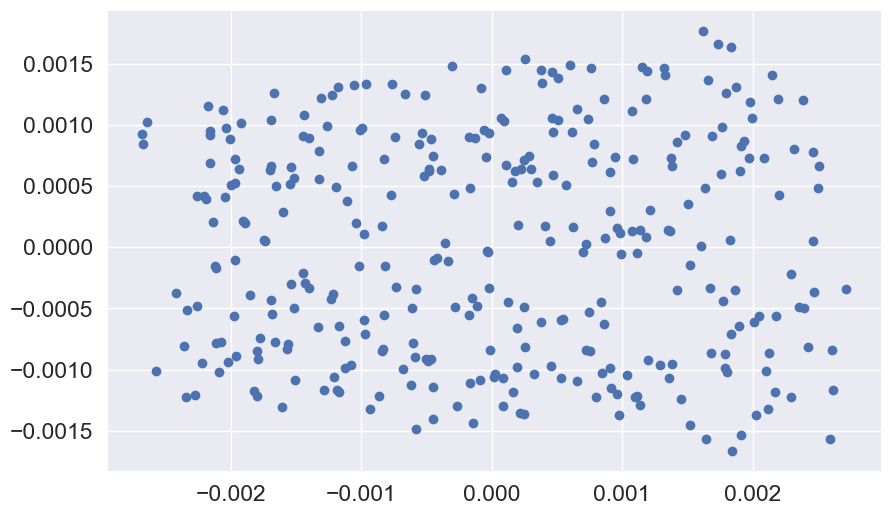

In [148]:
plt.scatter(X_pc_train[:,0],X_pc_train[:,1])

In [149]:
# train on the train set
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_pc_train,y_train)

KNeighborsClassifier()

In [150]:
# Cross_validation
from sklearn.model_selection import  cross_val_score

cross_val_score(knn_clf, X_pc_train, y_train, cv = 3, scoring = 'accuracy')

array([0.58878505, 0.68224299, 0.5754717 ])

In [151]:
#prediciton
from sklearn.metrics import precision_score
y_pred = knn_clf.predict(X_pc_train)
precision_score(y_pred,y_train,average="micro")

0.775

# Changing stuff a little bit

In [152]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39993,39994,39995,39996,39997,39998,39999,40000,40001,label
0,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0
1,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0
2,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0
3,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0
4,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,...,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0


(-23.70925588607788,
 20.73118848800659,
 -19.569486904144288,
 18.555549907684327)

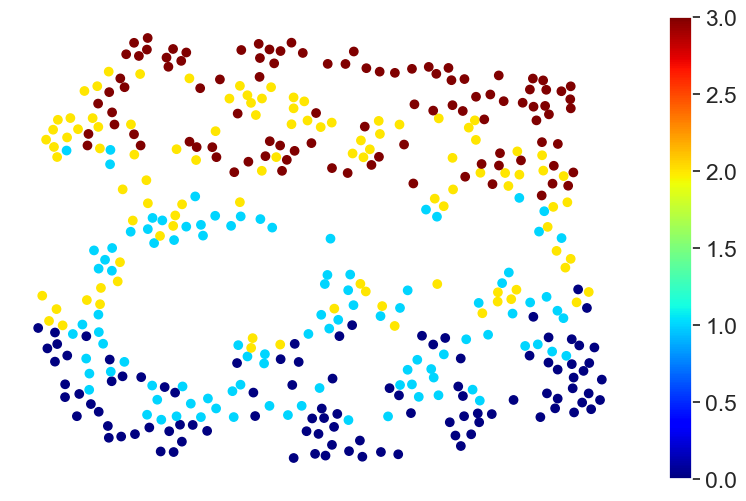

In [153]:
# applying tsne to the whole Dataset

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(data_df.drop("label",axis=1))

plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c =data_df.label, cmap='jet')
plt.colorbar()
plt.axis('off')


In [154]:
# apllying pca to the whole data
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_reduced_pca = pd.DataFrame(pca.fit_transform(data_df.drop("label",axis=1)))
X_reduced_pca["label"] = data_df.label

(-0.0030081895740975144,
 0.0030659603357174716,
 -0.0018461415943375984,
 0.0019430217696018873)

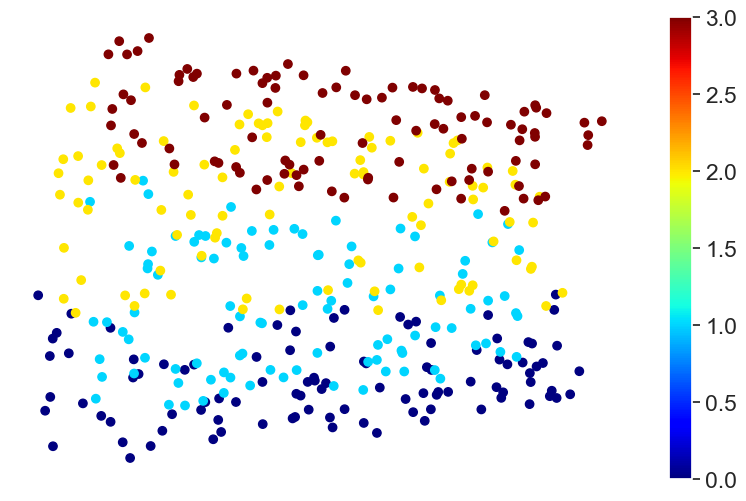

In [155]:
plt.scatter(X_reduced_pca[0],X_reduced_pca[1],c=X_reduced_pca.label, cmap="jet")
plt.colorbar()
plt.axis('off')

In [156]:
pca.explained_variance_ratio_.sum()

0.9487725283688145

In [157]:
# apllying pca to the whole data with 3 components


pca = PCA(n_components = 3)
X_reduced_pca = pd.DataFrame(pca.fit_transform(data_df.drop("label",axis=1)))
X_reduced_pca["label"] = data_df.label

In [158]:
import plotly.express as px
fig = px.scatter_3d(X_reduced_pca, x=0, y=1, z=2, color='label')

# Show the plot
fig.show()

In [159]:
pca.explained_variance_ratio_.sum()

0.9837508001282881

In [160]:
# applying tsne to the whole Dataset with 3 components

tsne = TSNE(n_components = 3, random_state = 42)
X_reduced = pd.DataFrame(tsne.fit_transform(data_df.drop("label",axis=1))
)
X_reduced["label"] = data_df.label

fig = px.scatter_3d(X_reduced, x=0, y=1, z=2, color='label')

# Show the plot
fig.show()

# Tring to aplly a simple MLP!

In [161]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39993,39994,39995,39996,39997,39998,39999,40000,40001,label
0,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0
1,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0
2,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,...,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0
3,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,0.000074,...,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0.000073,0
4,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,...,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0


In [162]:
X_train_full = data_df.drop("label",axis=1)
y_train_full = data_df.label


X_valid, X_train = X_train_full[:40], X_train_full[40:]
y_valid, y_train = y_train_full[:40], y_train_full[40:]

In [163]:
import tensorflow as tf
from tensorflow import keras
# creating a model using the Sequential API

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[40002]),
    keras.layers.Dense(300,activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [164]:
X_valid.shape

(40, 40002)

In [165]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 40002)             0         
                                                                 
 dense_103 (Dense)           (None, 300)               12000900  
                                                                 
 dense_104 (Dense)           (None, 100)               30100     
                                                                 
 dense_105 (Dense)           (None, 10)                1010      
                                                                 
Total params: 12032010 (45.90 MB)
Trainable params: 12032010 (45.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
10/10 [==============================] - 6s 344ms/step - loss: 1.8263 - accuracy: 0.3531 - val_loss: 5.3314 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 3s 278ms/step - loss: 1.4802 - accuracy: 0.4719 - val_loss: 3.9206 - val_accuracy: 0.5125
Epoch 3/50
10/10 [==============================] - 3s 278ms/step - loss: 1.2379 - accuracy: 0.5188 - val_loss: 2.5397 - val_accuracy: 0.6125
Epoch 4/50
10/10 [==============================] - 3s 283ms/step - loss: 1.2061 - accuracy: 0.5625 - val_loss: 1.9895 - val_accuracy: 0.6125
Epoch 5/50
10/10 [==============================] - 3s 283ms/step - loss: 1.1360 - accuracy: 0.5625 - val_loss: 1.7395 - val_accuracy: 0.6250
Epoch 6/50
10/10 [==============================] - 3s 286ms/step - loss: 1.1097 - accuracy: 0.5688 - val_loss: 1.7950 - val_accuracy: 0.5875
Epoch 7/50
10/10 [==============================] - 3s 287ms/step - loss: 1.1540 - accuracy: 0.5094 - val_loss: 1.5390 - val_accuracy: 0.6125
Epoch 

(0.0, 1.0)

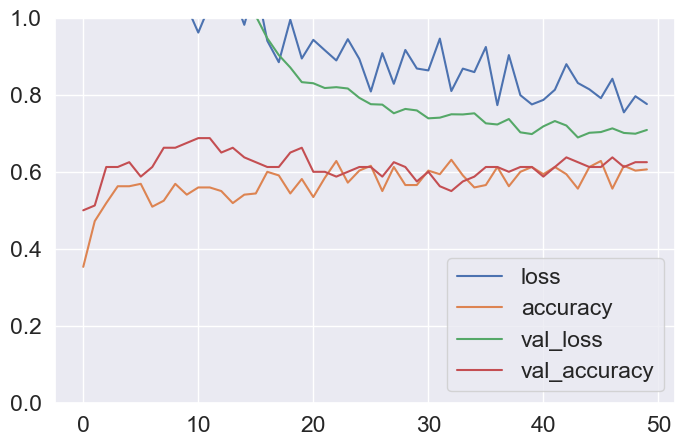

In [166]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your data
data = data_df
# Split the data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

optimizer = Adam(learning_rate=0.1)  # Adjust the learning rate as needed

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# we can plot the learning rate
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range


# its all going to shit. Vou fazer pca antes

In [179]:
X_reduced_pca.head()

,0,1,2,label
0,0.001758,-0.001093,0.000296,0
1,0.000868,-0.001190,0.000366,0
2,-0.001205,-0.000908,0.000013,0
3,-0.000968,-0.001362,0.000480,0
4,-0.001796,-0.000865,-0.000028,0


In [174]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your data
data = X_reduced_pca

# Split the data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your model
model = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=60, validation_data=(X_test_scaled, y_test))


Epoch 1/150
10/10 [==============================] - 1s 25ms/step - loss: 2.0829 - accuracy: 0.4000 - val_loss: 1.7364 - val_accuracy: 0.6125
Epoch 2/150
10/10 [==============================] - 0s 7ms/step - loss: 1.5473 - accuracy: 0.5625 - val_loss: 1.2333 - val_accuracy: 0.5750
Epoch 3/150
10/10 [==============================] - 0s 7ms/step - loss: 1.1192 - accuracy: 0.5562 - val_loss: 0.8958 - val_accuracy: 0.5750
Epoch 4/150
10/10 [==============================] - 0s 9ms/step - loss: 0.8708 - accuracy: 0.5688 - val_loss: 0.7538 - val_accuracy: 0.6125
Epoch 5/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7678 - accuracy: 0.6031 - val_loss: 0.7105 - val_accuracy: 0.6125
Epoch 6/150
10/10 [==============================] - 0s 8ms/step - loss: 0.7227 - accuracy: 0.5844 - val_loss: 0.6919 - val_accuracy: 0.5875
Epoch 7/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7002 - accuracy: 0.5906 - val_loss: 0.6905 - val_accuracy: 0.5875
Epoch 8/150


(0.0, 1.0)

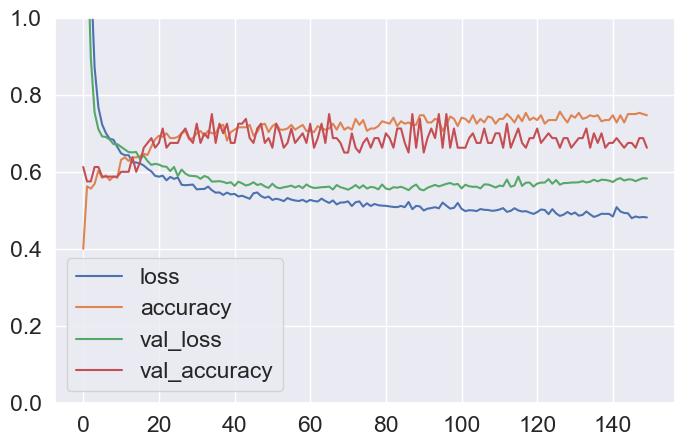

In [175]:
# we can plot the learning rate
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range


trying different models

Epoch 1/60
10/10 [==============================] - 1s 28ms/step - loss: 1.2437 - accuracy: 0.4750 - val_loss: 1.0319 - val_accuracy: 0.6375
Epoch 2/60
10/10 [==============================] - 0s 8ms/step - loss: 0.9801 - accuracy: 0.6031 - val_loss: 0.8239 - val_accuracy: 0.6250
Epoch 3/60
10/10 [==============================] - 0s 8ms/step - loss: 0.8255 - accuracy: 0.5844 - val_loss: 0.7368 - val_accuracy: 0.5875
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 0.7470 - accuracy: 0.5750 - val_loss: 0.7009 - val_accuracy: 0.5875
Epoch 5/60
10/10 [==============================] - 0s 9ms/step - loss: 0.7032 - accuracy: 0.5813 - val_loss: 0.6792 - val_accuracy: 0.5875
Epoch 6/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.6406 - val_loss: 0.6761 - val_accuracy: 0.6000
Epoch 7/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.6187 - val_loss: 0.6646 - val_accuracy: 0.5875
Epoch 8/60
10/10 [=

(0.0, 1.0)

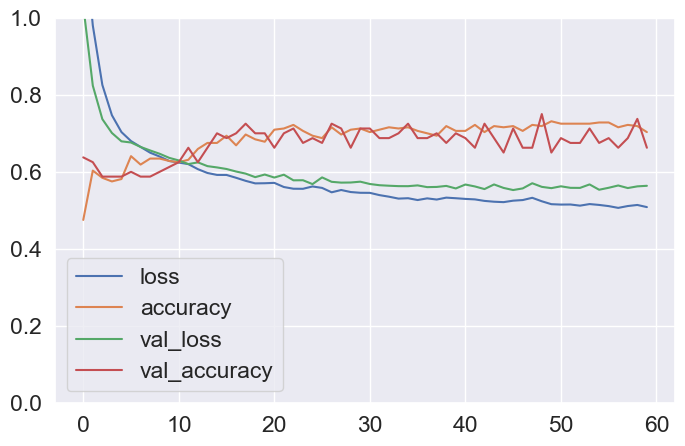

In [181]:
# Load your data
data = X_reduced_pca

# Split the data into features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define your model
model = keras.models.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=60, validation_data=(X_test_scaled, y_test))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range


Epoch 1/160
10/10 [==============================] - 1s 26ms/step - loss: 1.5483 - accuracy: 0.1813 - val_loss: 1.5032 - val_accuracy: 0.1375
Epoch 2/160
10/10 [==============================] - 0s 7ms/step - loss: 1.4558 - accuracy: 0.2531 - val_loss: 1.4119 - val_accuracy: 0.2500
Epoch 3/160
10/10 [==============================] - 0s 8ms/step - loss: 1.3731 - accuracy: 0.3438 - val_loss: 1.3302 - val_accuracy: 0.3750
Epoch 4/160
10/10 [==============================] - 0s 7ms/step - loss: 1.2967 - accuracy: 0.4344 - val_loss: 1.2538 - val_accuracy: 0.4000
Epoch 5/160
10/10 [==============================] - 0s 7ms/step - loss: 1.2235 - accuracy: 0.5094 - val_loss: 1.1775 - val_accuracy: 0.4750
Epoch 6/160
10/10 [==============================] - 0s 8ms/step - loss: 1.1515 - accuracy: 0.5375 - val_loss: 1.1043 - val_accuracy: 0.5500
Epoch 7/160
10/10 [==============================] - 0s 9ms/step - loss: 1.0810 - accuracy: 0.5719 - val_loss: 1.0364 - val_accuracy: 0.6125
Epoch 8/160


(0.0, 1.0)

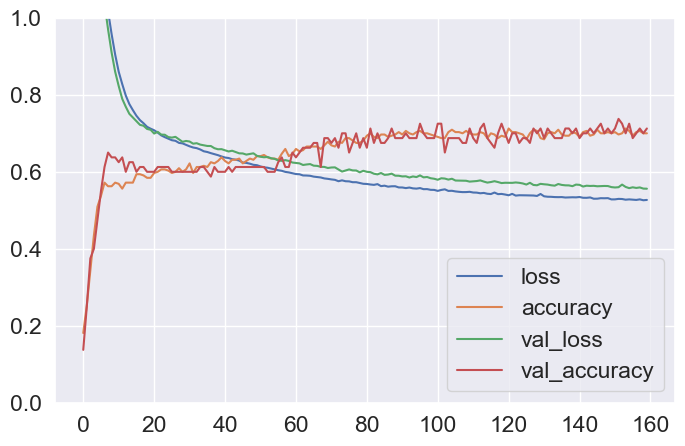

In [187]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # define the input object

hidden1 = keras.layers.Dense(30, activation="relu")(input_) # We are just telling keras how to connect the layers together when calling (input_). No data is being processed!
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # same here, we are using it as a function by passing(hidden1), but this just tells how to connect the layers!
concat = keras.layers.Concatenate()([input_,hidden2]) # once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
output = keras.layers.Dense(4,activation="softmax")(concat) # Creating the output layer 

model = keras.Model(inputs=[input_], outputs=[output]) # finally we create de model, specifying the input and output


# Now we just do the same thing we did before!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=160, validation_data=(X_test_scaled, y_test))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range

Epoch 1/160
10/10 [==============================] - 1s 35ms/step - loss: 1.1544 - accuracy: 0.5219 - val_loss: 0.9063 - val_accuracy: 0.6875
Epoch 2/160
10/10 [==============================] - 0s 9ms/step - loss: 0.8781 - accuracy: 0.5562 - val_loss: 0.7266 - val_accuracy: 0.6250
Epoch 3/160
10/10 [==============================] - 0s 9ms/step - loss: 0.7397 - accuracy: 0.5875 - val_loss: 0.6796 - val_accuracy: 0.5875
Epoch 4/160
10/10 [==============================] - 0s 9ms/step - loss: 0.6755 - accuracy: 0.6125 - val_loss: 0.6781 - val_accuracy: 0.6000
Epoch 5/160
10/10 [==============================] - 0s 9ms/step - loss: 0.6619 - accuracy: 0.6000 - val_loss: 0.6494 - val_accuracy: 0.6125
Epoch 6/160
10/10 [==============================] - 0s 9ms/step - loss: 0.6405 - accuracy: 0.6187 - val_loss: 0.6392 - val_accuracy: 0.6250
Epoch 7/160
10/10 [==============================] - 0s 9ms/step - loss: 0.6307 - accuracy: 0.6375 - val_loss: 0.6405 - val_accuracy: 0.6125
Epoch 8/160


(0.0, 1.0)

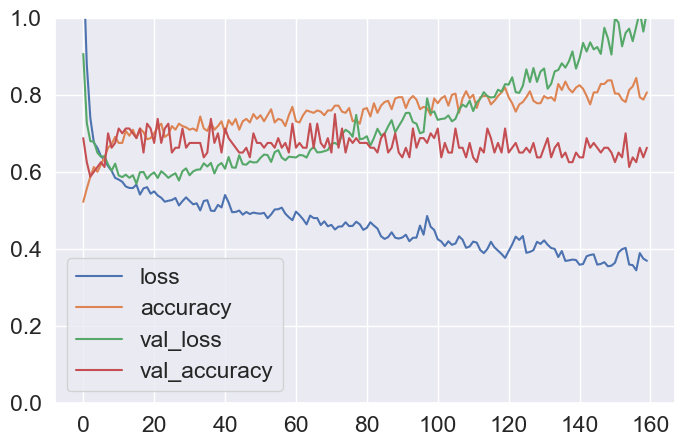

In [189]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # define the input object

hidden1 = keras.layers.Dense(300, activation="relu")(input_) # We are just telling keras how to connect the layers together when calling (input_). No data is being processed!
hidden2 = keras.layers.Dense(200, activation="relu")(hidden1) # same here, we are using it as a function by passing(hidden1), but this just tells how to connect the layers!
hidden3 = keras.layers.Dense(100, activation="relu")(hidden2) 
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3) 
concat = keras.layers.Concatenate()([input_,hidden4]) # once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
output = keras.layers.Dense(4,activation="softmax")(concat) # Creating the output layer 

model = keras.Model(inputs=[input_], outputs=[output]) # finally we create de model, specifying the input and output


# Now we just do the same thing we did before!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=160, validation_data=(X_test_scaled, y_test))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertical range

## using tensor board!

In [191]:
# set the path
import os
my_path = "c:\\Users\\diogo\\Documents\\ml_training"
root_logdir = os.path.join(my_path,"my_logs")

def get_run_logdir(name):
    import time
    from pathlib import Path


    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    training_log_dir_path = Path((run_id))
    training_log_dir = str(training_log_dir_path)
    
    return os.path.join(root_logdir, training_log_dir+name)
run_logdir = get_run_logdir("test")


In [195]:
#define one model

input_ = keras.layers.Input(shape=X_train.shape[1:]) # define the input object

hidden1 = keras.layers.Dense(300, activation="relu")(input_) # We are just telling keras how to connect the layers together when calling (input_). No data is being processed!
hidden2 = keras.layers.Dense(200, activation="relu")(hidden1) # same here, we are using it as a function by passing(hidden1), but this just tells how to connect the layers!
hidden3 = keras.layers.Dense(100, activation="relu")(hidden2) 
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3) 
concat = keras.layers.Concatenate()([input_,hidden4]) # once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
output = keras.layers.Dense(4,activation="softmax")(concat) # Creating the output layer 

model = keras.Model(inputs=[input_], outputs=[output]) # finally we create de model, specifying the input and output


# Now we just do the same thing we did before!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# use the TensorBoard callback:
run_logdir = get_run_logdir("wide")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=90,validation_data=(X_valid, y_valid),callbacks=[tensorboard_cb])

Epoch 1/90
10/10 [==============================] - 2s 35ms/step - loss: 1.3867 - accuracy: 0.2531 - val_loss: 1.4115 - val_accuracy: 0.0000e+00
Epoch 2/90
10/10 [==============================] - 0s 12ms/step - loss: 1.3862 - accuracy: 0.2250 - val_loss: 1.4162 - val_accuracy: 0.0000e+00
Epoch 3/90
10/10 [==============================] - 0s 11ms/step - loss: 1.3861 - accuracy: 0.2250 - val_loss: 1.4339 - val_accuracy: 0.0000e+00
Epoch 4/90
10/10 [==============================] - 0s 11ms/step - loss: 1.3855 - accuracy: 0.2594 - val_loss: 1.4376 - val_accuracy: 0.0000e+00
Epoch 5/90
10/10 [==============================] - 0s 11ms/step - loss: 1.3858 - accuracy: 0.2562 - val_loss: 1.4585 - val_accuracy: 0.0000e+00
Epoch 6/90
10/10 [==============================] - 0s 11ms/step - loss: 1.3855 - accuracy: 0.2562 - val_loss: 1.4520 - val_accuracy: 0.0000e+00
Epoch 7/90
10/10 [==============================] - 0s 11ms/step - loss: 1.3866 - accuracy: 0.2313 - val_loss: 1.4714 - val_accura

In [196]:
# define another model
input_ = keras.layers.Input(shape=X_train.shape[1:]) # define the input object

hidden1 = keras.layers.Dense(30, activation="relu")(input_) # We are just telling keras how to connect the layers together when calling (input_). No data is being processed!
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # same here, we are using it as a function by passing(hidden1), but this just tells how to connect the layers!
concat = keras.layers.Concatenate()([input_,hidden2]) # once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer
output = keras.layers.Dense(4,activation="softmax")(concat) # Creating the output layer 

model = keras.Model(inputs=[input_], outputs=[output]) # finally we create de model, specifying the input and output


# Now we just do the same thing we did before!
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# use the TensorBoard callback:
run_logdir = get_run_logdir("wide_bur_way_less_units")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=90,validation_data=(X_valid, y_valid),callbacks=[tensorboard_cb])

Epoch 1/90
10/10 [==============================] - 2s 39ms/step - loss: 1.3867 - accuracy: 0.3031 - val_loss: 1.3995 - val_accuracy: 0.0000e+00
Epoch 2/90
10/10 [==============================] - 0s 8ms/step - loss: 1.3859 - accuracy: 0.2562 - val_loss: 1.4079 - val_accuracy: 0.0000e+00
Epoch 3/90
10/10 [==============================] - 0s 8ms/step - loss: 1.3857 - accuracy: 0.2562 - val_loss: 1.4150 - val_accuracy: 0.0000e+00
Epoch 4/90
10/10 [==============================] - 0s 9ms/step - loss: 1.3854 - accuracy: 0.2562 - val_loss: 1.4174 - val_accuracy: 0.0000e+00
Epoch 5/90
10/10 [==============================] - 0s 7ms/step - loss: 1.3855 - accuracy: 0.2562 - val_loss: 1.4268 - val_accuracy: 0.0000e+00
Epoch 6/90
10/10 [==============================] - 0s 7ms/step - loss: 1.3853 - accuracy: 0.2562 - val_loss: 1.4294 - val_accuracy: 0.0000e+00
Epoch 7/90
10/10 [==============================] - 0s 8ms/step - loss: 1.3853 - accuracy: 0.2562 - val_loss: 1.4333 - val_accuracy: 0.